# Sequential Parameter Optimization
## Using `scipy` Optimizers

* This notebook describes how different optimizers form the `scipy optimize` package can be used on the surrogate.
* The optimization algorithms are available from [https://docs.scipy.org/doc/scipy/reference/optimize.html](https://docs.scipy.org/doc/scipy/reference/optimize.html)

In [1]:
import numpy as np
from math import inf
from spotPython.fun.objectivefunctions import analytical
from spotPython.spot import spot
from scipy.optimize import shgo
from scipy.optimize import direct
from scipy.optimize import differential_evolution
from scipy.optimize import dual_annealing
from scipy.optimize import basinhopping
import matplotlib.pyplot as plt

### The Objective Function Branin

* The `spotPython` package provides several classes of objective functions.
* We will use an analytical objective function, i.e., a function that can be described by a (closed) formula.
* Here we will use the Branin function. The 2-dim Branin function is

    $$y = a * (x2 - b * x1**2 + c * x1 - r) ** 2 + s * (1 - t) * cos(x1) + s,$$ 
    where values of a, b, c, r, s and t are: 
    $a = 1, b = 5.1 / (4*pi**2), c = 5 / pi, r = 6, s = 10$ and $t = 1 / (8*pi)$.

* It has three global minima:
    
    $f(x) = 0.397887$ at $(-\pi, 12.275)$, $(\pi, 2.275)$, and $(9.42478, 2.475)$.

* Input Domain: This function is usually evaluated on the square  x1 in  [-5, 10] x x2 in [0, 15].

In [2]:
from spotPython.fun.objectivefunctions import analytical
lower = np.array([-5,-0])
upper = np.array([10,15])

In [3]:
fun = analytical(seed=123).fun_branin

## The Optimizer

* Differential Evalution from the `scikit.optimize` package, see [https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.differential_evolution.html#scipy.optimize.differential_evolution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.differential_evolution.html#scipy.optimize.differential_evolution) is the default optimizer for the search on the surrogate.
* Other optimiers that are available in `spotPython`:
    * `dual_annealing`
    *  `direct`
    * `shgo`
    * `basinhopping`, see [https://docs.scipy.org/doc/scipy/reference/optimize.html#global-optimization](https://docs.scipy.org/doc/scipy/reference/optimize.html#global-optimization).

* These can be selected as follows:

    ` surrogate_control = "model_optimizer": differential_evolution`


* We will use `differential_evolution`.
* The optimizer can use `1000` evaluations. This value will be passed to the `differential_evolution` method, which has the argument `maxiter` (int). It defines the maximum number of generations over which the entire differential evolution population is evolved, see [https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.differential_evolution.html#scipy.optimize.differential_evolution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.differential_evolution.html#scipy.optimize.differential_evolution)

In [4]:
spot_de = spot.Spot(fun=fun,
                   lower = lower,
                   upper = upper,
                   fun_evals = 20,
                   max_time = inf,
                   seed=125,
                   noise=False,
                   show_models= False,
                   design_control={"init_size": 10},
                   surrogate_control={"n_theta": 2,
                                      "model_optimizer": differential_evolution,
                                      "model_fun_evals": 1000,
                                      })
spot_de.run()

## Print the Results

In [5]:
spot_de.print_results()

min y: 0.39951958110619046
x0: -3.1570201165683587
x1: 12.289980569430284


[['x0', -3.1570201165683587], ['x1', 12.289980569430284]]

## Show the Progress

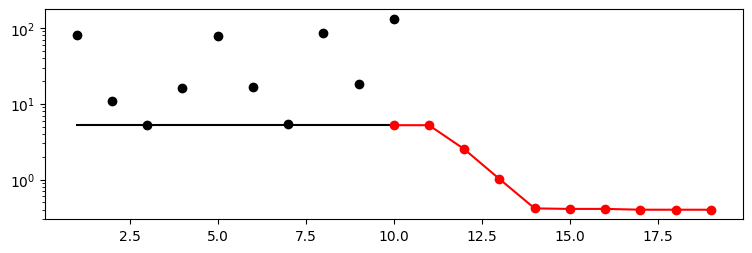

In [6]:
spot_de.plot_progress(log_y=True)

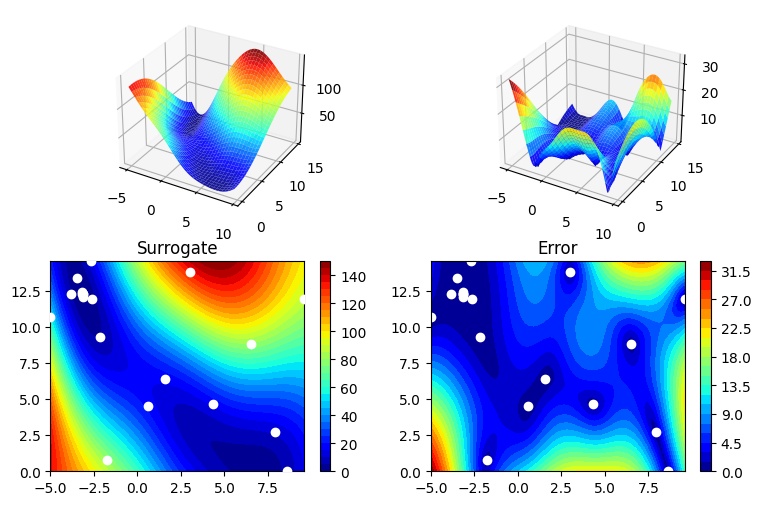

In [7]:
spot_de.surrogate.plot()

# Exercises

* Important:
    * Results from these exercises should be added to this document, i.e., you should submit an updated version of this notebook.
    * Please combine your results using this notebook.
    * Only one notebook from each group!
    * Presentation is based on this notebook. No addtional slides are required!
    * spotPython version `0.16.11` (or greater) is required (see http://www.gm.fh-koeln.de/~bartz/site/download/ 

## Exercise 1

* Each team member should choose one of the following optimization algorithms.
* Please add your name to the section title!

### 1. `dual_annealing`

* Describe the optimization algorithm
* Use the algorithm as an optimizer on the surrogate

### 2. `direct`

* Describe the optimization algorithm
* Use the algorithm as an optimizer on the surrogate

### 3. `shgo`

* Describe the optimization algorithm
* Use the algorithm as an optimizer on the surrogate

### 4. `basinhopping`

* Describe the optimization algorithm
* Use the algorithm as an optimizer on the surrogate



## Exercise 2

(All group members): 
* Compare the performance and run time of the 5 different optimizers:
    * `differential_evolution`
    * `dual_annealing`
    *  `direct`
    * `shgo`
    * `basinhopping`.
* The Branin function has three global minima:
  * $f(x) = 0.397887$  at 
    * $(-\pi, 12.275)$, 
    * $(\pi, 2.275)$, and 
    * $(9.42478, 2.475)$.
  * Which optima are found by the optimizers? Does the `seed` change this behavior?